In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 1
b = 1
k = 1
gamma = 1
def f(p):
    return gamma*p

def g(p):
    return a + b/(1+k/(p**2))

from scipy.optimize import fsolve #Para los interceptos, tomado de https://glowingpython.blogspot.com/2011/05/hot-to-find-intersection-of-two.html
def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

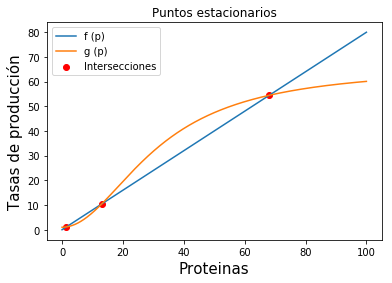

In [4]:
gamma = 0.8
a = 1
b = 65
k = 1000
p = np.linspace(1e-3,100,200000)
plt.plot(p,f(p),label = "f (p)")
plt.plot(p,g(p),label = 'g (p)')
inter = np.zeros(3)
i = 0
for x0 in [0.1,14,40]:
    inter[i] = findIntersection(f,g,x0)
    i+=1
plt.scatter(inter,f(inter),color = 'r', label = "Intersecciones")
plt.legend()
plt.plot()
plt.xlabel("Proteinas", fontsize =15)
plt.ylabel("Tasas de producción", fontsize =15)
plt.title("Puntos estacionarios")
plt.savefig("i1.png",dpi=1200)

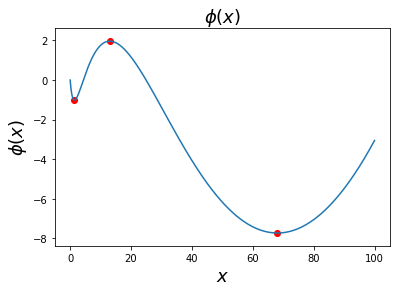

In [5]:
from scipy.integrate import quad
def heh(n):
    return (f(n)-g(n))/(f(n)+g(n))
def phi(xp):
    return 2*quad(heh,a=0,b=xp)[0]
x = np.linspace(1e-3,100,100000)
phis = np.zeros_like(x)
phis2 = np.zeros_like(inter)
for i in range(len(x)):
    phis[i] = phi(x[i])
for i in range(len(inter)):
    phis2[i] = phi(inter[i])
plt.plot(x,phis)
plt.scatter(inter,phis2,color = 'r')
plt.title("$\phi(x)$",fontsize=18)
plt.ylabel("$\phi(x)$",fontsize=18)
plt.xlabel("$x$",fontsize=18)
plt.savefig("i2.png",dpi=1200)

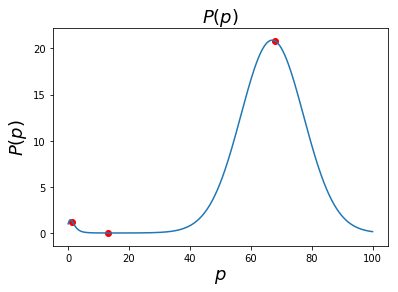

In [6]:
Pe = np.exp(-phis)/(f(x)+g(x))
plt.plot(x,Pe)
plt.scatter(inter,np.exp(-phis2)/(f(inter)+g(inter)), color = 'r')
#plt.xlim(0,25)
#plt.ylim(0,0.1)
plt.title("$P(p)$",fontsize=18)
plt.ylabel("$P(p)$",fontsize=18)
plt.xlabel("$p$",fontsize=18)
plt.savefig("i3.png",dpi=1200)